# Library

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import skew, kurtosis

from analysis.visualization import *
from model.preprocessing import preprocessing_categorical
from utils import *

# Data

In [ ]:
df = pd.read_csv(
    r'../../data/',
    encoding='utf-8',
)

In [37]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [38]:
df.head()

,temperature,humidity,wind_speed,precipitation_(%),cloud_cover,atmospheric_pressure,uv_index,season,visibility_(km),location,weather_type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


# Load metadata

In [39]:
df = load_metadata(
    df,
    r"D:\_Dev\My Project\Weather Classification\code\data\metadata\metadata1.json",
)

# Overview

## Check

In [40]:
print(f"Num of varibles:", df.shape[1])
print(f"Num of rows:", df.shape[0])

Num of varibles: 11
Num of rows: 13200


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temperature           13200 non-null  float64
 1   humidity              13200 non-null  int64  
 2   wind_speed            13200 non-null  float64
 3   precipitation_(%)     13200 non-null  float64
 4   cloud_cover           13200 non-null  object 
 5   atmospheric_pressure  13200 non-null  float64
 6   uv_index              13200 non-null  int64  
 7   season                13200 non-null  object 
 8   visibility_(km)       13200 non-null  float64
 9   location              13200 non-null  object 
 10  weather_type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [42]:
df.isnull().sum()

temperature             0
humidity                0
wind_speed              0
precipitation_(%)       0
cloud_cover             0
atmospheric_pressure    0
uv_index                0
season                  0
visibility_(km)         0
location                0
weather_type            0
dtype: int64

## Varibles and target
**The target variable has two units for rainfall: millimeters (mm) and inches (in). For simplicity, We will use millimeters (mm) for measurement**

In [43]:
target = ['weather_type']
variables = [col for col in df.columns if col not in target]

df_target = df[target]
df.drop(columns=target, axis=1, inplace=True)

# Grouping Varibles by their respective data types

In [44]:
numerical_cols, categorical_cols, _ = group_columns_by_type(df, display_info=True)

Total numeric columns: 7
Numeric columns: ['temperature', 'humidity', 'wind_speed', 'precipitation_(%)', 'atmospheric_pressure', 'uv_index', 'visibility_(km)']

Total categorical columns: 3
Categorical columns: ['cloud_cover', 'season', 'location']



# Univarite analysis

## Numerical variables

In [45]:
numerical_cols

['temperature',
 'humidity',
 'wind_speed',
 'precipitation_(%)',
 'atmospheric_pressure',
 'uv_index',
 'visibility_(km)']

In [46]:
df = convert_columns_to_numeric(df, numerical_cols)

### Descriptive statistics for numeric columns

In [47]:
df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,13200.0,19.127576,17.386327,-25.00,4.0,21.00,31.0000,109.00
humidity,13200.0,68.710833,20.194248,20.00,57.0,70.00,84.0000,109.00
wind_speed,13200.0,9.832197,6.908704,0.00,5.0,9.00,13.5000,48.50
precipitation_(%),13200.0,53.644394,31.946541,0.00,19.0,58.00,82.0000,109.00
atmospheric_pressure,13200.0,1005.827896,37.199589,800.12,994.8,1007.65,1016.7725,1199.21
uv_index,13200.0,4.005758,3.856600,0.00,1.0,3.00,7.0000,14.00
visibility_(km),13200.0,5.462917,3.371499,0.00,3.0,5.00,7.5000,20.00


### Histogram

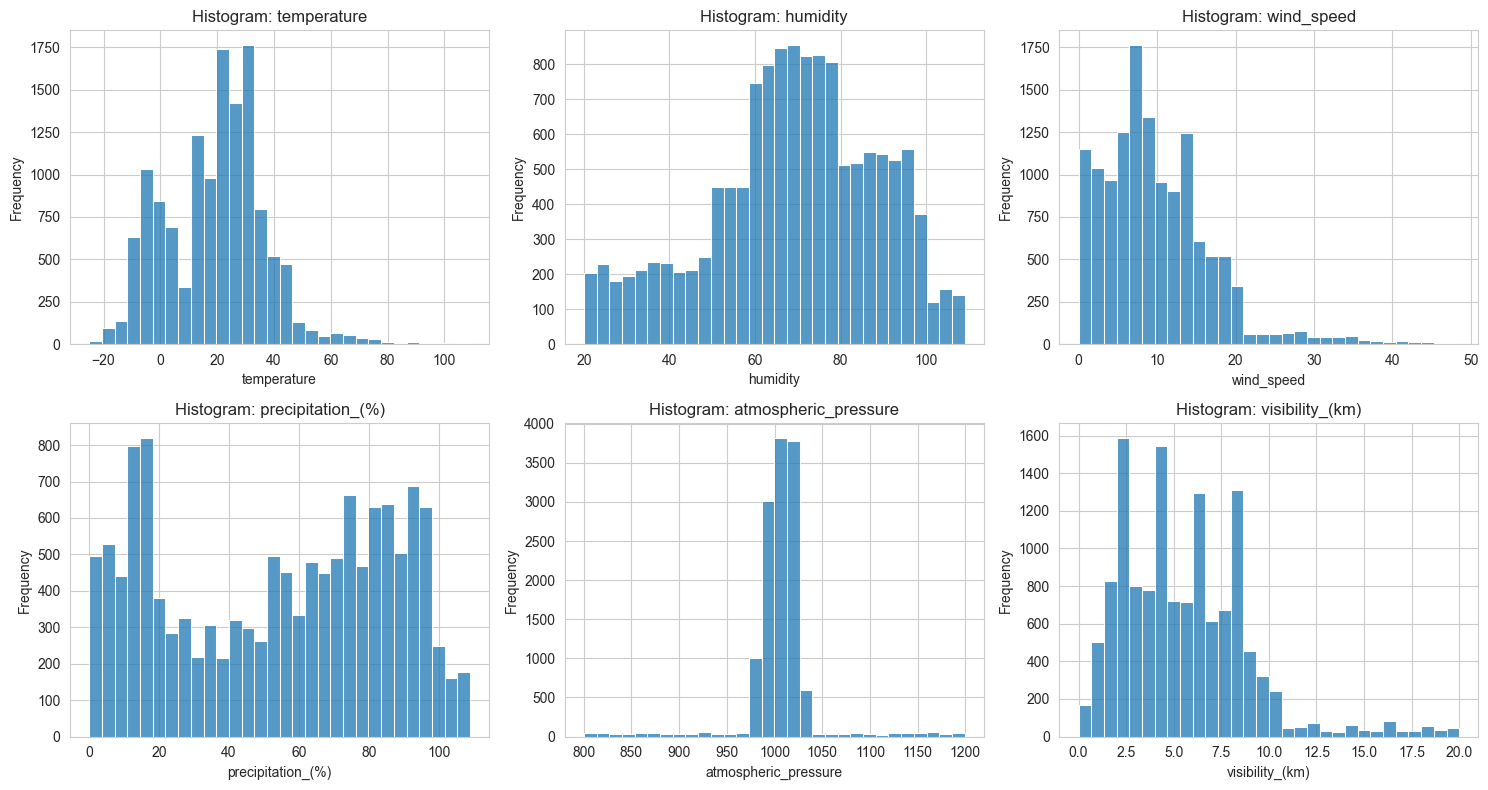

In [69]:
plot_multiple_histograms(df, numerical_cols, bins=30, color=None)

### KDE

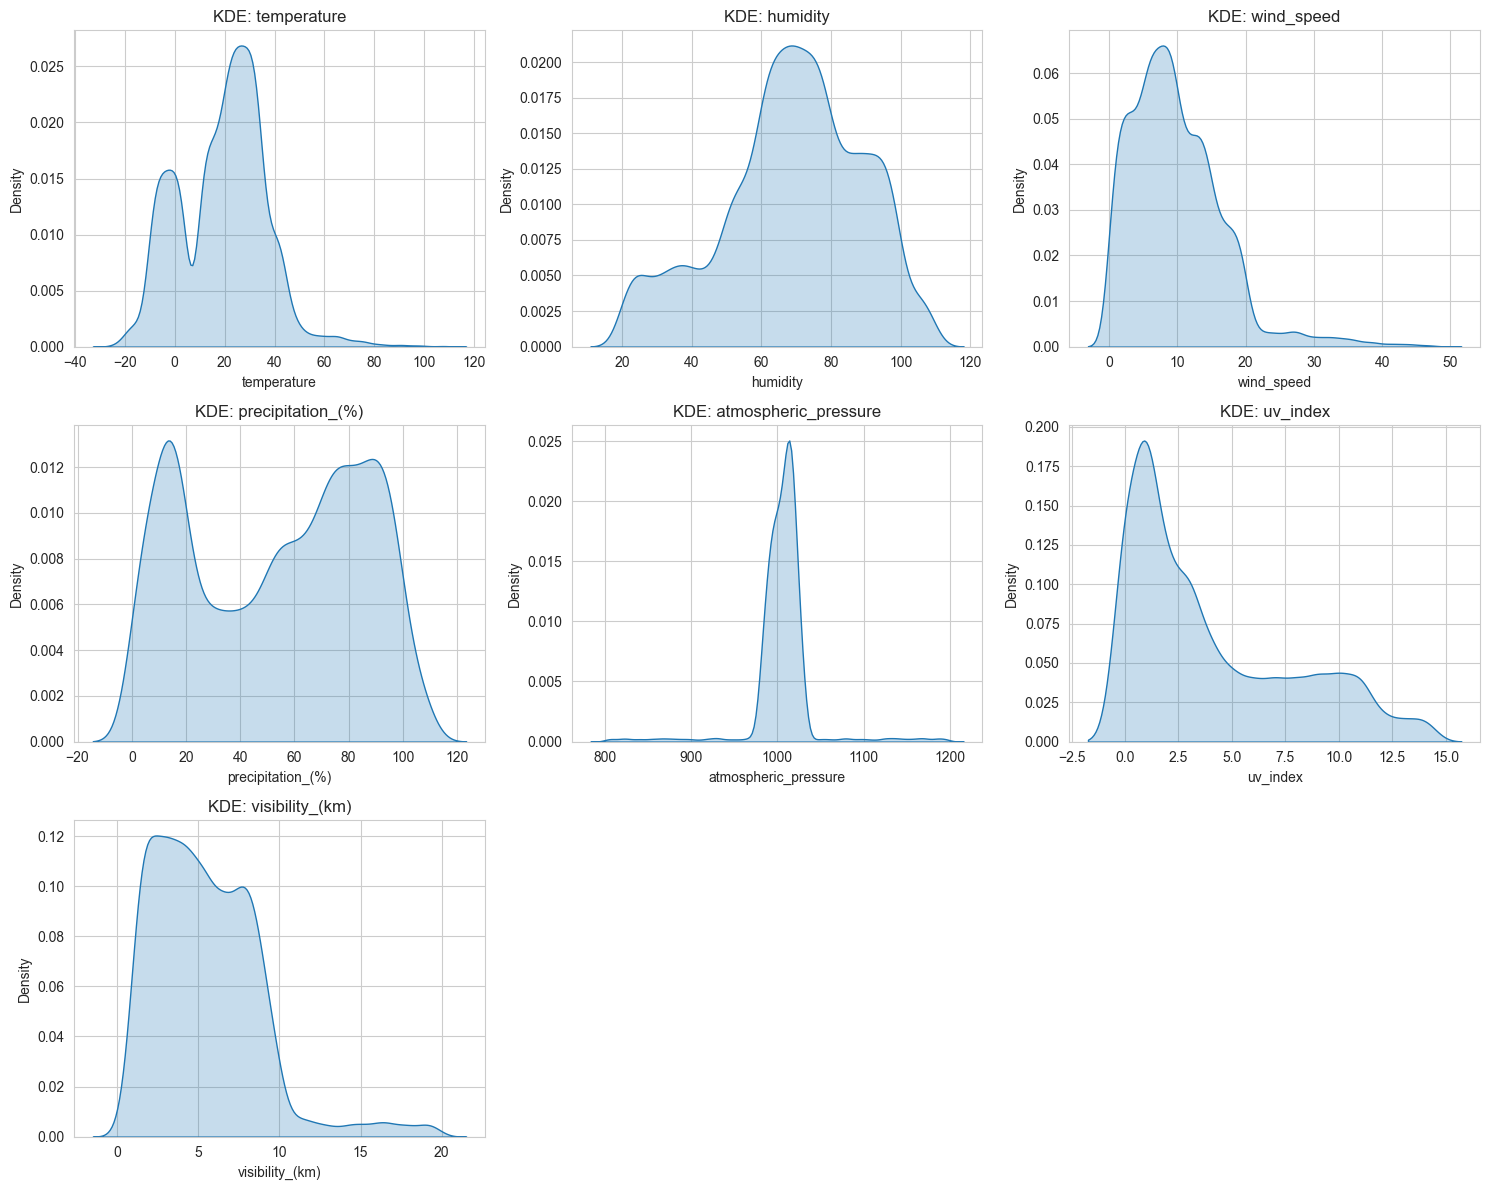

In [49]:
plot_multiple_kdeplots(df, numerical_cols, color=None, fill=True)

### Compute skew and kurtosis

In [50]:
result = []
for col in numerical_cols:
    sk = skew(df[col].dropna())
    kt = kurtosis(df[col].dropna())
    result.append({"Variable": col, "Skewness": sk, "Kurtosis": kt})
pd.DataFrame(result)

,Variable,Skewness,Kurtosis
0,temperature,0.221716,0.585374
1,humidity,-0.401569,-0.338692
2,wind_speed,1.360108,3.253506
3,precipitation_(%),-0.152440,-1.353980
4,atmospheric_pressure,-0.293865,12.772776
5,uv_index,0.899908,-0.362483
6,visibility_(km),1.233135,2.515867


### Boxplot

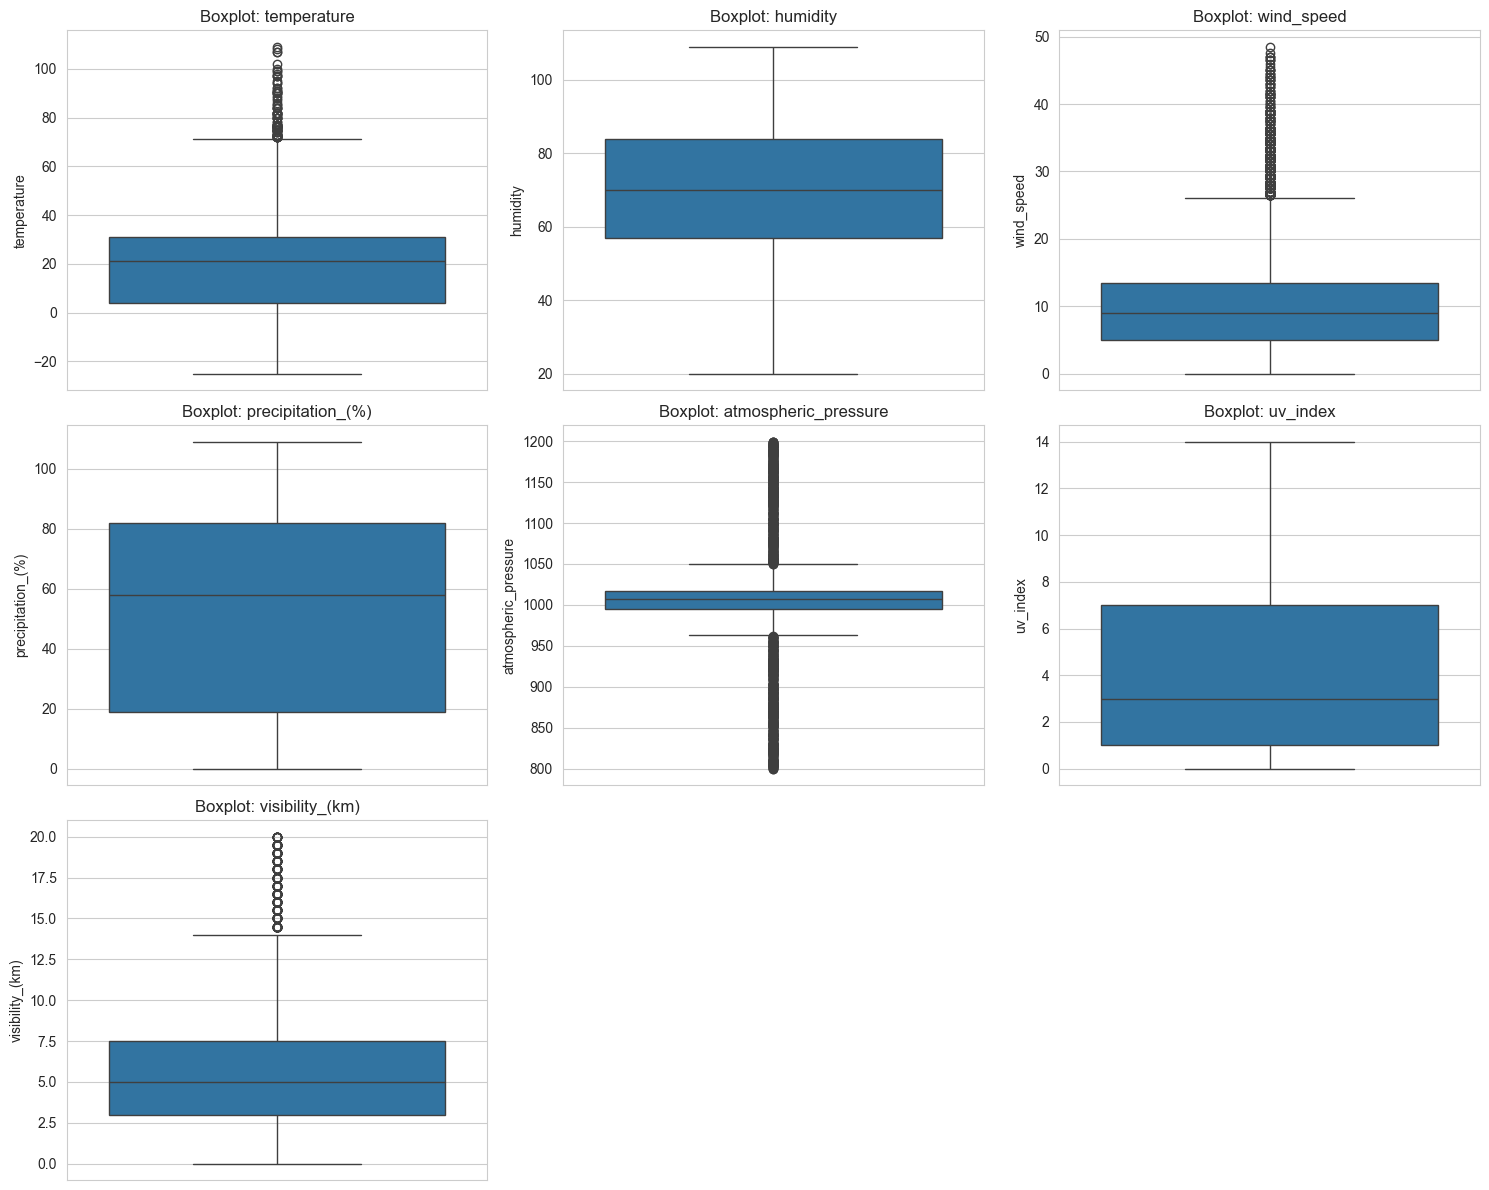

In [51]:
plot_multiple_boxplots(df, numerical_cols, n_cols=3)

### After

In [52]:
cols = ['uv_index']

for col in cols:
    if col in numerical_cols:
        numerical_cols.remove(col)

for col in cols:
    if col not in categorical_cols:
        categorical_cols.append(col)

## Categorical variables

In [53]:
df = convert_columns_to_category(df, categorical_cols)

### Unique values in each variables

In [54]:
for col in categorical_cols:
    print(f"Column: {col}")
    print(f"Number of unique values in {col}: {df[col].nunique()}")
    print(f"Unique values in {col}: {df[col].unique()}")
    print()

Column: cloud_cover
Number of unique values in cloud_cover: 4
Unique values in cloud_cover: ['partly cloudy', 'clear', 'overcast', 'cloudy']
Categories (4, object): ['clear', 'cloudy', 'overcast', 'partly cloudy']

Column: season
Number of unique values in season: 4
Unique values in season: ['Winter', 'Spring', 'Summer', 'Autumn']
Categories (4, object): ['Autumn', 'Spring', 'Summer', 'Winter']

Column: location
Number of unique values in location: 3
Unique values in location: ['inland', 'mountain', 'coastal']
Categories (3, object): ['coastal', 'inland', 'mountain']

Column: uv_index
Number of unique values in uv_index: 15
Unique values in uv_index: [2, 7, 5, 1, 0, ..., 13, 10, 14, 6, 12]
Length: 15
Categories (15, int64): [0, 1, 2, 3, ..., 11, 12, 13, 14]



### Value counts

In [55]:
for col in categorical_cols:
    print(df[col].value_counts().sort_values(ascending=False).reset_index())
    print()

     cloud_cover  count
0       overcast   6090
1  partly cloudy   4560
2          clear   2139
3         cloudy    411

   season  count
0  Winter   5610
1  Spring   2598
2  Autumn   2500
3  Summer   2492

   location  count
0    inland   4816
1  mountain   4813
2   coastal   3571

   uv_index  count
0         1   2837
1         0   2097
2         2   1465
3         3   1432
4         4    831
5         5    591
6        11    582
7        10    577
8         9    572
9         7    543
10        8    532
11        6    524
12       12    218
13       14    210
14       13    189



### Countplot

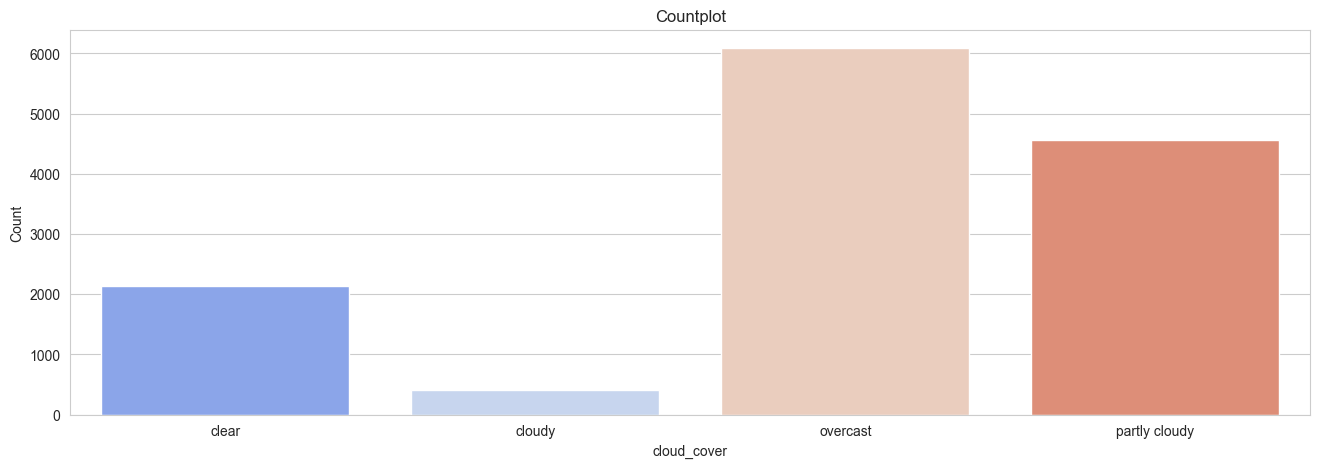

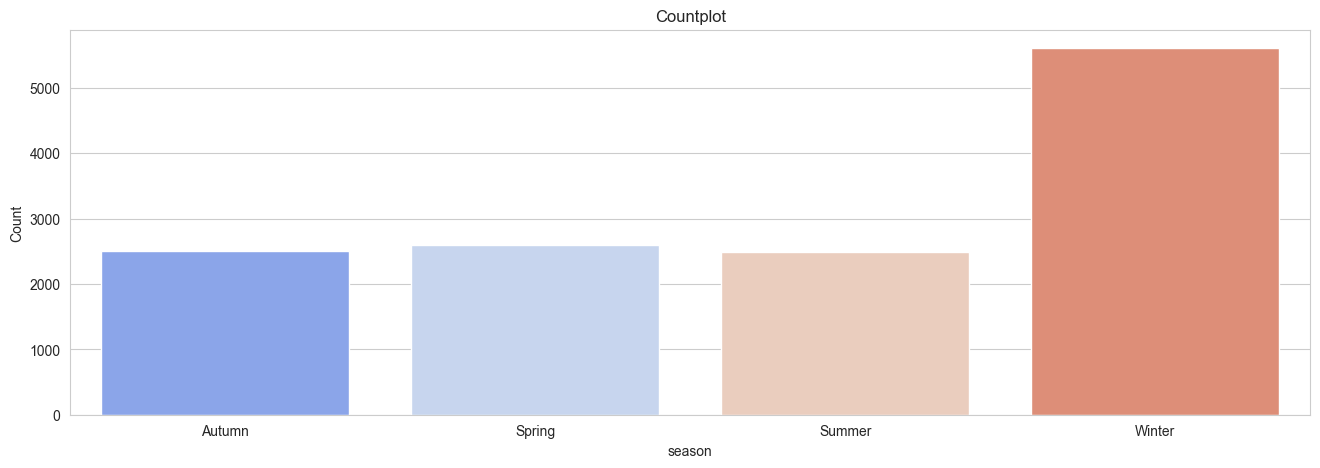

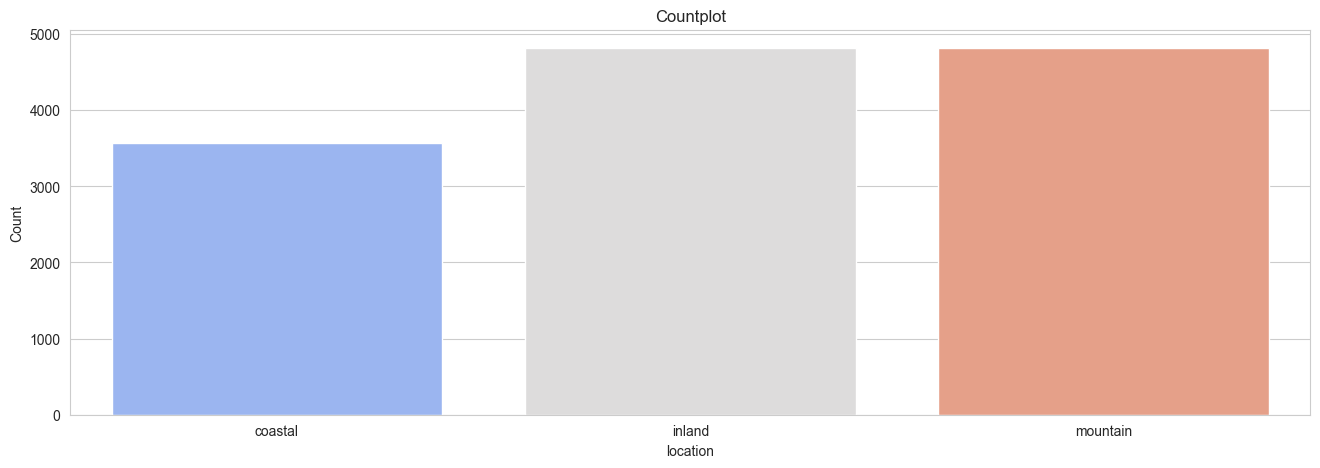

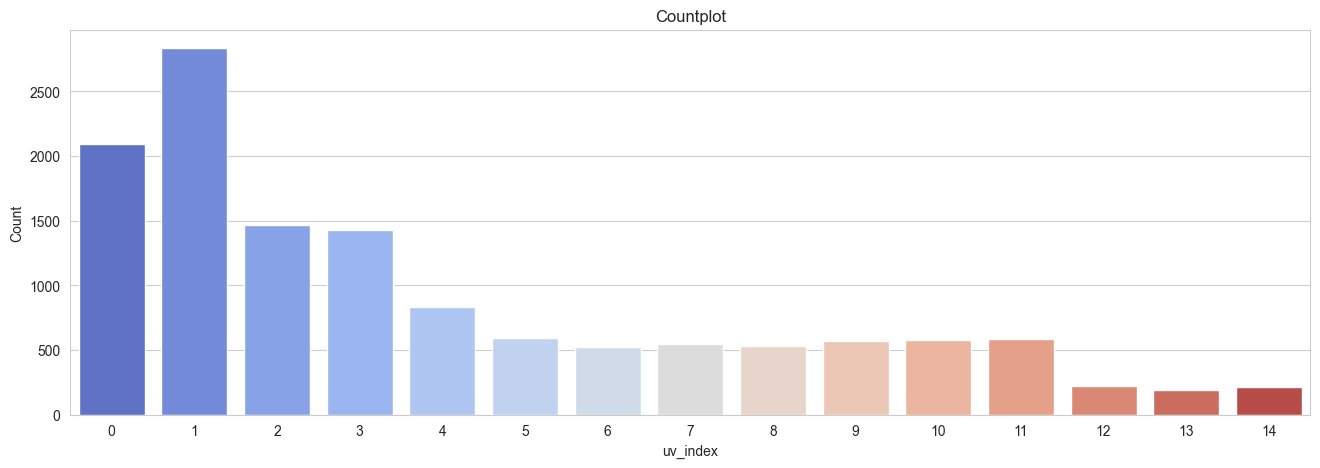

In [56]:
for col in categorical_cols:
    plot_countplot(df, col, hue=None, palette="coolwarm", figsize=(16, 5))

# Target

In [57]:
df_target.columns

Index(['weather_type'], dtype='object')

In [58]:
df_target[target] = convert_column_to_category(df_target, target[0])

## Descriptive statistics 

In [59]:
class_counts = df_target.value_counts()
class_counts

weather_type
Cloudy          3300
Rainy           3300
Snowy           3300
Sunny           3300
Name: count, dtype: int64

In [60]:
class_percent = df_target.value_counts(normalize=True) * 100
class_percent

weather_type
Cloudy          25.0
Rainy           25.0
Snowy           25.0
Sunny           25.0
Name: proportion, dtype: float64

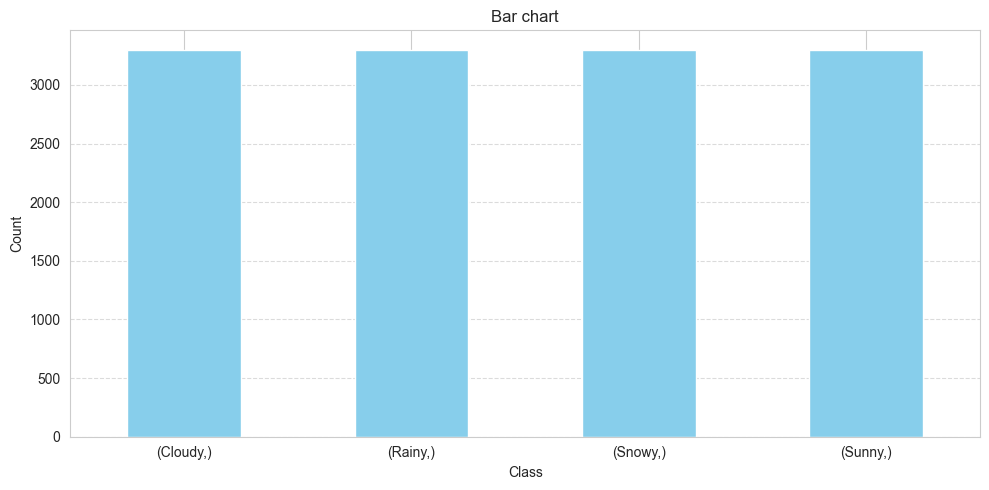

In [61]:
plt.figure(figsize=(10, 5))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Bar chart')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


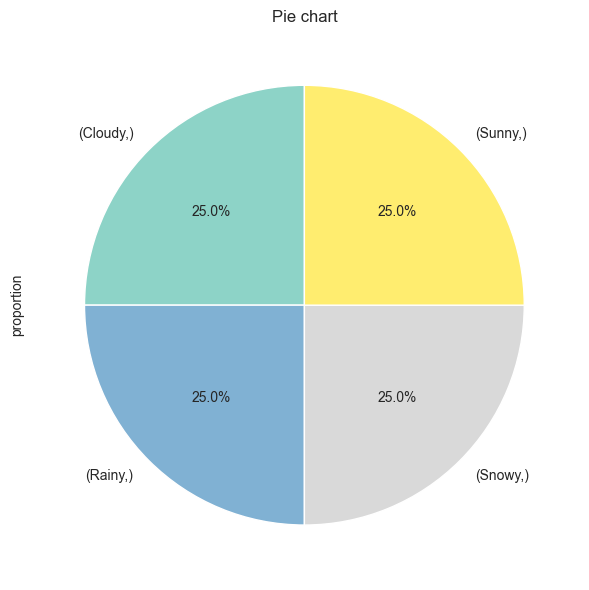

In [62]:
plt.figure(figsize=(6, 6))
class_percent.plot(kind='pie', autopct='%.1f%%', startangle=90, cmap='Set3')
plt.title('Pie chart')
plt.tight_layout()
plt.show()

## Label Encoding

In [63]:
df_target = preprocessing_categorical(df_target, ordinal_cols=target)

In [64]:
df_target.value_counts()

weather_type
0               3300
1               3300
2               3300
3               3300
Name: count, dtype: int64

In [65]:
df_target = convert_column_to_category(df_target, target[0])

# Save

In [66]:
df = pd.concat([df[numerical_cols+categorical_cols], df_target], axis=1)

## Metadata `.json`

In [67]:
save_metadata(
    df,
    "D:\_Dev\My Project\Weather Classification\code\data\metadata\metadata2.json",
)

## To `.csv`

In [68]:
df.to_csv(
    r"D:\_Dev\My Project\Weather Classification\code\data\clean\clean2.csv",
    index=False,
    encoding="utf-8",
)